# Load and Explore the Data

In [1]:
import pandas as pd

df = pd.read_csv("ab_test_data.csv")
df.head()

,user_id,group,converted
0,1,A,0
1,2,B,0
2,3,A,0
3,4,A,0
4,5,A,0


In [2]:
df['group'].value_counts()

A    5013
B    4987
Name: group, dtype: int64

In [3]:
df.groupby('group')['converted'].mean()

group
A    0.099541
B    0.119110
Name: converted, dtype: float64

# Visualize Conversion Rate

C:\Users\jiaqi\AppData\Local\Temp\ipykernel_28164\3365612740.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'group', y = 'converted', data = df, ci = None)


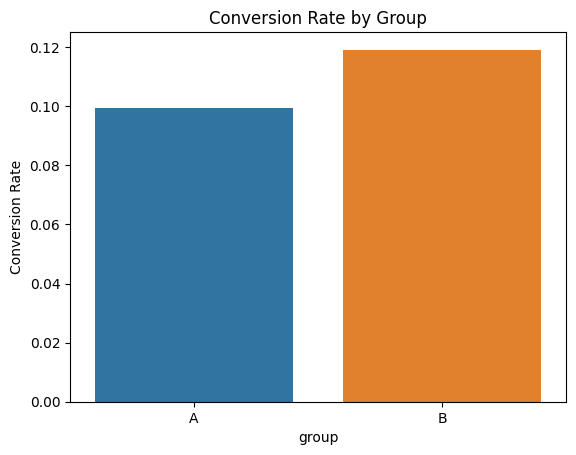

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot( x = 'group', y = 'converted', data = df, ci = None)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

# Run a Statistial Test (Z-test)

In [6]:
from statsmodels.stats.proportion import proportions_ztest

# Count conversions and totals
conv_counts = df.groupby('group')['converted'].sum().values
n_obs = df.groupby('group')['converted'].count().values

# Run z-test
stat, pval = proportions_ztest(conv_counts, n_obs)
print(f"Z-stat: {stat: .3f}, p-value: {pval: .4f}")

Z-stat: -3.136, p-value:  0.0017


# Result Interpretation
Group A had a conversion rate of 9.95%, Group B had 11.9%.
The p-value was 0.0017, which is < 0.05, so the result is statistically significant.
We recommend deploying the green button (Group B).